In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy
plt.rc('font',family='Times New Roman')
matplotlib.get_cachedir()
matplotlib.rcParams.update({'font.size': 12})

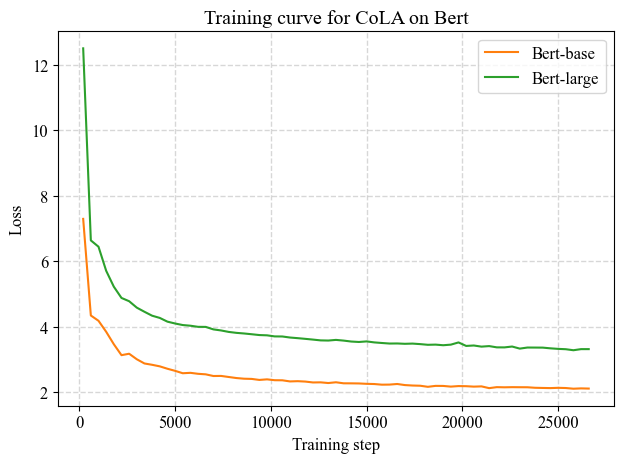

In [6]:

def read(path, gap=2):
    xs, accs, losses = [], [], []
    with open(path) as f:
        for line in f:
            if line.startswith("global_step"):
                xs.append(float(line.split(" = ")[-1]))
            if line.startswith("f1"):
                accs.append(float(line.split(" = ")[-1]))
            if line.startswith("loss"):
                losses.append(float(line.split(" = ")[-1]))
    return xs[::gap], accs[::gap], losses[::gap]

cola_bert_base_path = "logs/cola_base.txt"
cola_bert_large_path = "logs/cola_large.txt"
gpt2_base_path = "logs/gpt2_base.txt"
gpt2_medium_path = "logs/gpt2_medium.txt"

xs, accs, losses = read(cola_bert_base_path)
xss, accss, lossess = read(cola_bert_large_path)

plt.plot(xs, losses, label="Bert-base", color='tab:orange')
plt.plot(xss, lossess, label="Bert-large", color='tab:green')
plt.ylabel("Loss")
plt.xlabel("Training step")
plt.legend(loc="upper right")

# ax2 = plt.twinx()
# ax2.set_ylabel("Eval Loss")
# ax2.plot(xs, losses, label="Loss", color='tab:red')
# ax2.legend(loc="lower right")

plt.title("Training curve for CoLA on Bert")
plt.grid(linestyle='--', linewidth=1,alpha=0.5)
plt.tight_layout()
plt.savefig("distill_bert.pdf")

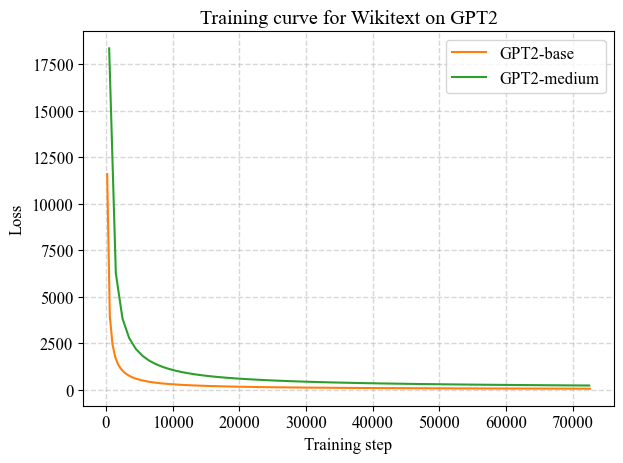

In [7]:
xs, accs, losses = read(gpt2_base_path)
xss, accss, lossess = read(gpt2_medium_path)

plt.plot(xs, losses, label="GPT2-base", color='tab:orange')
plt.plot(xss, lossess, label="GPT2-medium", color='tab:green')
plt.ylabel("Loss")
plt.xlabel("Training step")
plt.legend(loc="upper right")

# ax2 = plt.twinx()
# ax2.set_ylabel("Eval Loss")
# ax2.plot(xs, losses, label="Loss", color='tab:red')
# ax2.legend(loc="lower right")

plt.title("Training curve for Wikitext on GPT2")
plt.grid(linestyle='--', linewidth=1,alpha=0.5)
plt.tight_layout()
plt.savefig("distill_gpt2.pdf")